# HM1: Logistic Regression.

### Name: Lilli Nappi


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [594]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split



# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [595]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [596]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
df = pd.DataFrame(data)
df = df.drop('id', axis=1) # remove first column
df = df.drop('Unnamed: 32', axis=1) # remove first column
df = df.replace("B", 1) # transform B to 1
df = df.replace("M", -1) # transform M to -1
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.3. Partition to training and testing sets

In [597]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
x = df.drop('diagnosis', axis=1) # features
y = df['diagnosis'] # target

# Convert back to numpy instead of dataframe
x = x.to_numpy()
y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('shape of x_train: ' + str(x_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of y_test: ' + str(y_test.shape))

shape of x_train: (455, 30)
shape of x_test: (114, 30)
shape of y_train: (455,)
shape of y_test: (114,)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [598]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[ 0.02090745  0.16431943  0.03098111  0.01492717 -0.01921133  0.10117201
  0.08443932  0.02966041  0.04062134  0.09494587  0.04653776  0.06428674
  0.10007498  0.00538732  0.06601984  0.11839521  0.0676146   0.1268942
  0.01037956  0.16193656  0.01337734  0.1134187   0.03390329 -0.00517026
 -0.02001553  0.07842781  0.11756424  0.01212816 -0.02700714  0.12744666]
test std = 
[0.98484027 1.15221324 0.99783436 0.91061412 1.0932457  1.2099472
 1.1161288  1.0269985  1.00338544 1.16387855 0.86929628 1.0858163
 0.95737985 0.73797557 1.25342805 1.10484161 0.84117872 1.20913453
 1.04276269 1.05856313 0.94112163 1.03290181 0.96071251 0.84629366
 1.04566915 1.12995399 1.20449902 1.03206998 0.90827971 1.06240744]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [599]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = len(y)
    obj = 0
    for i in range(n):
        xw = numpy.dot(x[i].T, w)
        yxw = -numpy.dot(y[i], xw)
        exp = numpy.exp(yxw)
        obj += numpy.log(1 + exp)
    obj = (1/n) * obj + ((lam/2) * numpy.linalg.norm(w)**2)
    return obj


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [600]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = len(y)
    g = 0
    for i in range(n):
        yx = numpy.dot(y[i], x[i])
        xw = numpy.dot(x[i].T, w)
        yxw = numpy.dot(y[i], xw)
        g += (yx / (1 + numpy.exp(yxw)))
    g = ((-1/n) * g) + (lam*w)
    return g

In [601]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = []
    for _ in range(max_epoch):
        g = gradient(w, x, y, lam)
        w = w - learning_rate * g
        objval = objective(w, x, y, lam)
        objvals.append(objval)
    return w, objvals


Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [602]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = numpy.zeros((d,))
lam = 0
learning_rate = 0.01

# Train
opt_w_unreg_gd, opt_objs_unreg_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)

print("Optimal Weights:", opt_w_unreg_gd)
print("Objective Values:", opt_objs_unreg_gd)

Optimal Weights: [-0.15637705 -0.09929923 -0.15741962 -0.1493543  -0.0688684  -0.10881981
 -0.1310358  -0.15967353 -0.06136054  0.03186025 -0.11775999  0.00535405
 -0.11183312 -0.10977972  0.02869426 -0.02319539 -0.00570506 -0.05281004
  0.01198698  0.02504807 -0.16956317 -0.11322752 -0.16850389 -0.15676639
 -0.09369678 -0.1167062  -0.12768386 -0.16643329 -0.09536112 -0.05505308]
Objective Values: [0.6740504904431883, 0.6561424016036046, 0.6393412655606189, 0.6235674208444364, 0.608744430653614, 0.5947999468255626, 0.5816662323481144, 0.5692804010799712, 0.5575844416682697, 0.5465250888144059, 0.5360535950165916, 0.5261254440783661, 0.516700036553349, 0.5077403680206174, 0.4992127139036991, 0.49108632927233015, 0.4833331683495899, 0.47592762592037374, 0.46884630118029846, 0.4620677835224486, 0.4555724591416143, 0.44934233700306375, 0.44336089257755606, 0.43761292771837174, 0.43208444510336436, 0.42676253575458895, 0.42163527825941866, 0.41669164843712814, 0.4119214383153946, 0.40731518

In [603]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = numpy.zeros((d,))
lam = 0.1
learning_rate = 0.01

# Train
opt_w_reg_gd, opt_objs_reg_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)

print("Optimal Weights:", opt_w_reg_gd)
print("Objective Values:", opt_objs_reg_gd)

Optimal Weights: [-0.14962704 -0.09496211 -0.15063674 -0.14286587 -0.06602146 -0.10437897
 -0.12559701 -0.1528916  -0.05886316  0.03024108 -0.11259829  0.00510977
 -0.10693857 -0.10492719  0.02741929 -0.02254703 -0.00587296 -0.05088621
  0.01136781  0.02357569 -0.16221906 -0.10828703 -0.16121874 -0.14992934
 -0.08975433 -0.11190442 -0.12244664 -0.15942908 -0.09136059 -0.05292063]
Objective Values: [0.6740601924863768, 0.6561981503393536, 0.6394748067965083, 0.6238064204573661, 0.6091129690459283, 0.5953189748854932, 0.58235398157862, 0.5701527458358341, 0.5586552150184925, 0.5478063556237345, 0.5375558867998449, 0.5278579604092334, 0.51867081761124, 0.5099564424468654, 0.5016802256445607, 0.4938106465867354, 0.4863189776934927, 0.4791790130038987, 0.47236682113308864, 0.4658605217947286, 0.45964008450852106, 0.45368714782171227, 0.4479848572640937, 0.4425177202602228, 0.4372714762952023, 0.4322329807408644, 0.42739010087806856, 0.4227316227853086, 0.41824716789631033, 0.413927118155137

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [604]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def sgd_objective(w, xi, yi, lam):
    xw = numpy.dot(xi.T, w)
    yxw = yi * xw
    obj = numpy.log(1 + numpy.exp(-yxw))
    obj = obj + ((lam/2) * numpy.linalg.norm(w)**2)
    return obj

def stochastic_objective_gradient(w, xi, yi, lam):
    yx = yi * xi
    xw = numpy.dot(xi.T, w)
    yxw = yi * xw
    g = -(yx / (1 + numpy.exp(yxw)))
    g = g + (lam * w)
    obj = sgd_objective(w, xi, yi, lam)
    return obj, g  

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [605]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = len(y)
    objvals = []
    for _ in range(max_epoch):
        permute = numpy.random.permutation(n)
        objval = 0
        for i in range(n):
            xi = x[permute[i]]
            yi = y[permute[i]]
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            w = w - learning_rate * g
        objval = objval / n
        objvals.append(objval)
    return w, objvals
    

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [606]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = numpy.zeros((d,))
lam = 0
learning_rate = 0.01

# Train
opt_w_unreg_sgd, opt_objs_unreg_sgd = sgd(x_train, y_train, lam, learning_rate, w)

print("Optimal Weights:", opt_w_unreg_sgd)
print("Objective Values:", opt_objs_unreg_sgd)

Optimal Weights: [-0.28812595 -0.6044137  -0.27784466 -0.51347017 -0.18264478  0.66284051
 -0.90622511 -1.07686702 -0.41169474  0.17308794 -1.92215371  0.04689649
 -1.30776089 -1.44464999  0.3540549   1.01879042  0.10169709 -0.20754765
  0.1752277   1.14608077 -1.14462277 -1.30580547 -0.95327023 -1.27054176
 -0.70044508 -0.00804492 -1.15766524 -1.31834303 -0.69554528 -0.78709973]
Objective Values: [0.22412245635887115, 0.12341048338265947, 0.10400519293966204, 0.09413024055335002, 0.08766466915713696, 0.08320046754659263, 0.07968425841629995, 0.0771080467240298, 0.07483507199758269, 0.0730406269912228, 0.07147134481744907, 0.07008884348369843, 0.06882487562337766, 0.06774595817038691, 0.06680566462401133, 0.06592499147383496, 0.06514771082691373, 0.0644426589391065, 0.0637897772701976, 0.06316102322135843, 0.06258040585678114, 0.062066602396382, 0.06154442253719334, 0.061077054097858054, 0.06059330744303059, 0.06020194550410171, 0.05978985591157245, 0.05944019428121288, 0.0590736723565

In [607]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = numpy.zeros((d,))
lam = 0.1
learning_rate = 0.01

# Train
opt_w_reg_sgd, opt_objs_reg_sgd = sgd(x_train, y_train, lam, learning_rate, w)

print("Optimal Weights:", opt_w_reg_sgd)
print("Objective Values:", opt_objs_reg_sgd)

Optimal Weights: [-0.26785611 -0.22897975 -0.2662353  -0.27597429 -0.11924915 -0.10914276
 -0.22373273 -0.29805816 -0.11214321  0.09765374 -0.30494605 -0.01211996
 -0.26741192 -0.26591183  0.02252724  0.06582533  0.08147804 -0.01877342
  0.03197786  0.13660795 -0.33411782 -0.27542715 -0.3231786  -0.32584221
 -0.2162776  -0.17373174 -0.21587031 -0.30438248 -0.20489181 -0.10603176]
Objective Values: [0.2744299170912208, 0.2168097911970807, 0.21447568005082224, 0.2140820115741888, 0.21325176954536493, 0.21422619435056783, 0.2137851695311549, 0.21393108924931195, 0.21396098955143347, 0.21404046139991986, 0.21370338149664767, 0.2138797676479691, 0.21386585511191455, 0.21381711839190248, 0.21394018872657092, 0.21388699049466717, 0.2139125690319427, 0.21408001744815042, 0.21422857777033927, 0.2139224952686466, 0.2141800401265723, 0.21399312440422788, 0.2141132575269214, 0.21417148843484907, 0.2137338140619877, 0.213904979552172, 0.2137963746461197, 0.21386281742141275, 0.2139839733479853, 0.2

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [608]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label: b-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def mb_objective(w, xi, yi):
    xw = numpy.dot(xi.T, w)
    yxw = numpy.dot(yi, xw)
    obj = numpy.log(1 + numpy.exp(-yxw))
    return obj

def mb_objective_gradient(w, xi, yi, lam):
    b = len(yi)
    obj = 0
    g = numpy.zeros(d,)
    for i in range(b):
        yx = -yi[i] * xi[i]
        xw = numpy.dot(xi[i].T, w)
        g += (yx / (1 + numpy.exp(yi[i] * xw)))
        obj += mb_objective(w, xi[i], yi[i])
    obj = 1/b * obj + ((lam/2) * numpy.linalg.norm(w)**2)
    g = 1/b * g + (lam * w)
    return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [609]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)
def mbgd(x, y, lam, learning_rate, w, max_epoch=100):    
    n = len(y)
    objvals = []
    b = int(n / max_epoch)
    iteration = int(n/b)
    for _ in range(max_epoch):
        permute = numpy.random.permutation(n)
        obj = 0
        for i in range(iteration):
            start = i*b
            end = i*b+b
            permute = x[start:end]
            xi = permute
            permute = y[start:end]
            yi = permute
            temp, g = mb_objective_gradient(w, xi, yi, lam)
            obj += temp
            w = w - learning_rate * g
        obj = obj / b
        objvals.append(obj)
    return w, objvals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [610]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = numpy.zeros((d,))
lam = 0
learning_rate = 0.01

# Train
opt_w_unreg_mbgd, opt_objs_unreg_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

print("Optimal Weights:", opt_w_unreg_mbgd)
print("Objective Values:", opt_objs_unreg_mbgd)

Optimal Weights: [-0.47025075 -0.56840209 -0.46140721 -0.59135384 -0.2410556   0.13767393
 -0.63537462 -0.75223474 -0.30803071  0.24250906 -1.16237635 -0.06748564
 -0.93431026 -0.93540578  0.13238965  0.56899831  0.15839236  0.03194702
  0.13945766  0.59456048 -0.88412591 -0.8815956  -0.81290729 -0.94550399
 -0.62943253 -0.17569227 -0.69071768 -0.83610339 -0.57270847 -0.35099755]
Objective Values: [10.356339223717699, 6.019611287545098, 4.8511022539286826, 4.241207924422262, 3.855196431171955, 3.583832143587129, 3.3799912231161477, 3.2197574149136723, 3.0895784538672175, 2.9811383781159146, 2.88901790444343, 2.8095153708089464, 2.7400050686051416, 2.6785659615510613, 2.623755827628672, 2.574468016114397, 2.529837339148735, 2.489176346368497, 2.4519310282037297, 2.41764931100796, 2.3859581930733738, 2.35654685155364, 2.329153959618565, 2.3035580266577043, 2.2795699448586864, 2.2570271701052365, 2.2357891298506285, 2.2157335635304096, 2.1967535797530644, 2.1787552701566706, 2.16165575973

In [611]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = numpy.zeros((d,))
lam = 0.1
learning_rate = 0.01

# Train
opt_w_reg_mbgd, opt_objs_reg_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

print("Optimal Weights:", opt_w_reg_mbgd)
print("Objective Values:", opt_objs_reg_mbgd)

Optimal Weights: [-0.26634575 -0.22383251 -0.26509443 -0.2753438  -0.11202515 -0.11065411
 -0.23312296 -0.29794945 -0.10790127  0.09044756 -0.29739929 -0.0204923
 -0.26052803 -0.26143749  0.02190844  0.06732632  0.06824518 -0.01563571
  0.02247791  0.13471188 -0.33285437 -0.27749328 -0.3216724  -0.32532878
 -0.21129535 -0.1695872  -0.22366062 -0.30321716 -0.20698743 -0.10850268]
Objective Values: [10.741969118115593, 7.126651442148137, 6.465014106673555, 6.2262866558487895, 6.122611875852817, 6.072657633998987, 6.046788376366066, 6.032611357534774, 6.024458424235577, 6.019564871418931, 6.016512653963855, 6.014542853350942, 6.013233413831552, 6.012340959150433, 6.011720163747029, 6.011281288309855, 6.010967132687826, 6.010740159067658, 6.010575086111395, 6.010454502966131, 6.010366193865858, 6.010301457741276, 6.010254022643328, 6.010219325798212, 6.010194024751381, 6.010175658546734, 6.010162408796313, 6.010152928780779, 6.010146219809088, 6.010141540962729, 6.0101383427517225, 6.01013

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

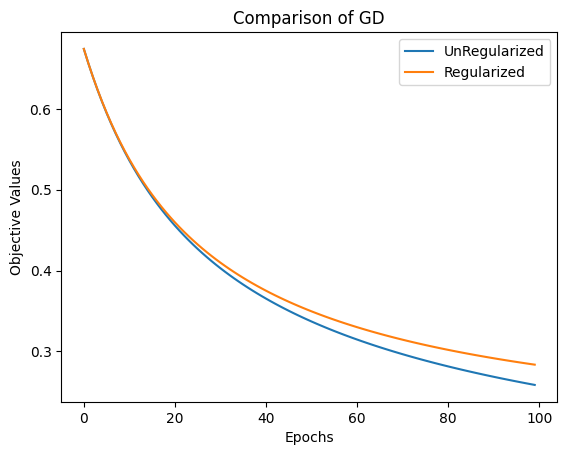

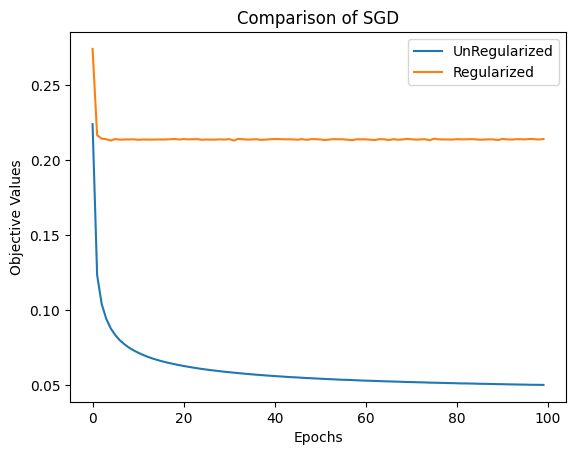

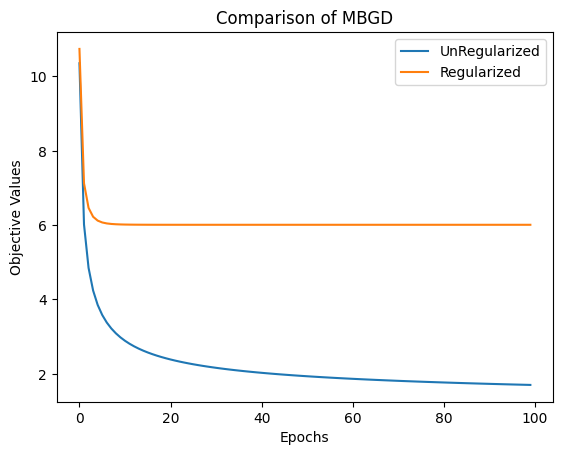

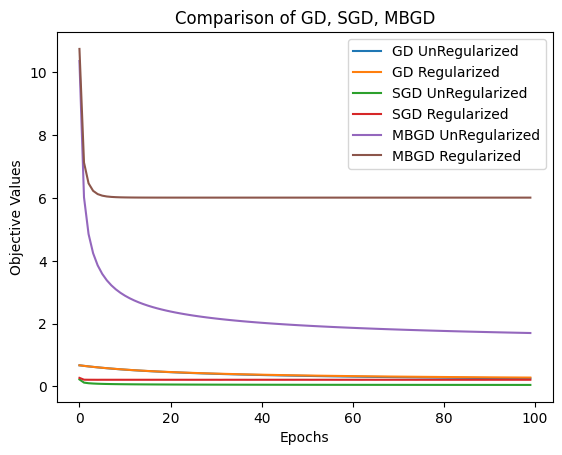

In [612]:
import matplotlib.pyplot as plt
%matplotlib inline

w = numpy.zeros((d,))

series_gd = pd.Series(opt_objs_unreg_gd).plot(label='UnRegularized')
series_gd = pd.Series(opt_objs_reg_gd).plot(label='Regularized')

plt.title('Comparison of GD')
plt.ylabel('Objective Values')
plt.xlabel('Epochs')
plt.legend()
plt.show()

series_sgd = pd.Series(opt_objs_unreg_sgd).plot(label='UnRegularized')
series_sgd = pd.Series(opt_objs_reg_sgd).plot(label='Regularized')

plt.title('Comparison of SGD')
plt.ylabel('Objective Values')
plt.xlabel('Epochs')
plt.legend()
plt.show()

series_mbgd = pd.Series(opt_objs_unreg_mbgd).plot(label='UnRegularized')
series_mbgd = pd.Series(opt_objs_reg_mbgd).plot(label='Regularized')

plt.title('Comparison of MBGD')
plt.ylabel('Objective Values')
plt.xlabel('Epochs')
plt.legend()
plt.show()

series_gd = pd.Series(opt_objs_unreg_gd).plot(label='GD UnRegularized')
series_gd = pd.Series(opt_objs_reg_gd).plot(label='GD Regularized')
series_sgd = pd.Series(opt_objs_unreg_sgd).plot(label='SGD UnRegularized')
series_sgd = pd.Series(opt_objs_reg_sgd).plot(label='SGD Regularized')
series_mbgd = pd.Series(opt_objs_unreg_mbgd).plot(label='MBGD UnRegularized')
series_mbgd = pd.Series(opt_objs_reg_mbgd).plot(label='MBGD Regularized')

plt.title('Comparison of GD, SGD, MBGD')
plt.ylabel('Objective Values')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [613]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    return numpy.sign(numpy.dot(X, w))

In [614]:
# evaluate training error of logistric regression and regularized version
from sklearn.metrics import accuracy_score

w = numpy.zeros((d,))

prediction = predict(opt_w_unreg_gd, x_train)
accuracy = accuracy_score(y_train, prediction)
print("Training Accuracy of GD UnRegularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_reg_gd, x_train)
accuracy = accuracy_score(y_train, prediction)
print("Training Accuracy of GD Regularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_unreg_sgd, x_train)
accuracy = accuracy_score(y_train, prediction)
print("Training Accuracy of SGD UnRegularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_reg_sgd, x_train)
accuracy = accuracy_score(y_train, prediction)
print("Training Accuracy of SGD Regularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_unreg_mbgd, x_train)
accuracy = accuracy_score(y_train, prediction)
print("Training Accuracy of MBGD UnRegularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_reg_mbgd, x_train)
accuracy = accuracy_score(y_train, prediction)
print("Training Accuracy of MBGD Regularized:", str(round(accuracy*100, 2)) + "%")


Training Accuracy of GD UnRegularized: 95.6%
Training Accuracy of GD Regularized: 95.6%
Training Accuracy of SGD UnRegularized: 99.12%
Training Accuracy of SGD Regularized: 98.02%
Training Accuracy of MBGD UnRegularized: 98.9%
Training Accuracy of MBGD Regularized: 97.36%


In [615]:
# evaluate testing error of logistric regression and regularized version
w = numpy.zeros((d,))

prediction = predict(opt_w_unreg_gd, x_test)
accuracy = accuracy_score(y_test, prediction)
print("Testing Accuracy of GD UnRegularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_reg_gd, x_test)
accuracy = accuracy_score(y_test, prediction)
print("Testing Accuracy of GD Regularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_unreg_sgd, x_test)
accuracy = accuracy_score(y_test, prediction)
print("Testing Accuracy of SGD UnRegularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_reg_sgd, x_test)
accuracy = accuracy_score(y_test, prediction)
print("Testing Accuracy of SGD Regularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_unreg_mbgd, x_test)
accuracy = accuracy_score(y_test, prediction)
print("Testing Accuracy of MBGD UnRegularized:", str(round(accuracy*100, 2)) + "%")

prediction = predict(opt_w_reg_mbgd, x_test)
accuracy = accuracy_score(y_test, prediction)
print("Testing Accuracy of MBGD Regularized:", str(round(accuracy*100, 2)) + "%")


Testing Accuracy of GD UnRegularized: 92.11%
Testing Accuracy of GD Regularized: 92.11%
Testing Accuracy of SGD UnRegularized: 96.49%
Testing Accuracy of SGD Regularized: 94.74%
Testing Accuracy of MBGD UnRegularized: 96.49%
Testing Accuracy of MBGD Regularized: 94.74%


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

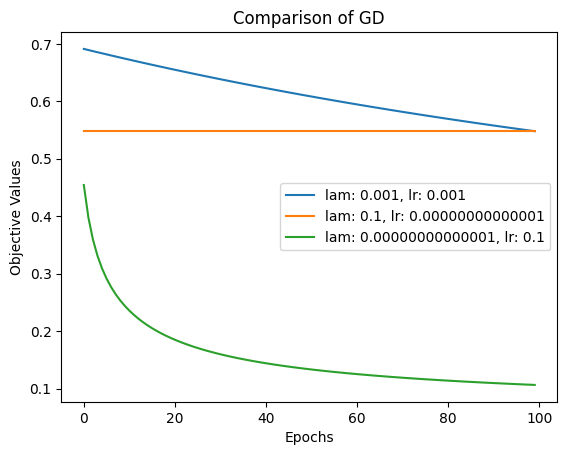

In [616]:
w = numpy.zeros((d,))
lam = 0.001
learning_rate = 0.001
w, objvals1 = gradient_descent(x_train, y_train, lam, learning_rate, w)

lam = 0.1
learning_rate = 0.00000000000001
w, objvals2 = gradient_descent(x_train, y_train, lam, learning_rate, w)

lam = 0.00000000000001
learning_rate = 0.1
w, objvals3 = gradient_descent(x_train, y_train, lam, learning_rate, w)

series_gd = pd.Series(objvals1).plot(label="lam: 0.001, lr: 0.001")
series_gd = pd.Series(objvals2).plot(label="lam: 0.1, lr: 0.00000000000001")
series_gd = pd.Series(objvals3).plot(label="lam: 0.00000000000001, lr: 0.1")

plt.title('Comparison of GD')
plt.ylabel('Objective Values')
plt.xlabel('Epochs')
plt.legend()
plt.show()
